In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [4]:
label_df = pd.read_csv('/kaggle/input/crowd-counting/labels.csv')
label_df.columns = ['id' , 'people']
label_df.head()

,id,people
0,1,35
1,2,41
2,3,41
3,4,44
4,5,41


In [5]:
img = np.load('/kaggle/input/crowd-counting/images.npy')
#img = img.reshape(img.shape[0], img.shape[1], img.shape[2], img.shape[3],1)
img.shape

(2000, 480, 640, 3)

In [6]:
labels = np.array(label_df['people'])
labels

array([35, 41, 41, ..., 25, 26, 26])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(img, labels, test_size=0.1)
print(x_train.shape[0])
print(x_test.shape[0])

1800
200


In [8]:
"""
x_train, x_test = x_train / 255.0, x_test / 255.0
"""

'\nx_train, x_test = x_train / 255.0, x_test / 255.0\n'

In [9]:

model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(480,640,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
    
])

model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 478, 638, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 239, 319, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 237, 317, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 158, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 118, 158, 128)     0         
_________________________________________________________________
flatten (Flatten)            (None, 2386432)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [10]:
lr_monitor = tf.keras.callbacks.LearningRateScheduler(
                lambda epochs : 1e-8 * 10 ** (epochs/20))


In [11]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32, callbacks=[lr_monitor])

Epoch 1/50
57/57 [==============================] - 18s 317ms/step - loss: 14.3408 - mae: 14.8351 - val_loss: 6.6830 - val_mae: 7.1668 - lr: 1.0000e-08
Epoch 2/50
57/57 [==============================] - 17s 307ms/step - loss: 10.4333 - mae: 10.9232 - val_loss: 6.5274 - val_mae: 7.0125 - lr: 1.1220e-08
Epoch 3/50
57/57 [==============================] - 18s 307ms/step - loss: 10.4721 - mae: 10.9634 - val_loss: 6.2558 - val_mae: 6.7317 - lr: 1.2589e-08
Epoch 4/50
57/57 [==============================] - 17s 307ms/step - loss: 10.1507 - mae: 10.6416 - val_loss: 6.1491 - val_mae: 6.6294 - lr: 1.4125e-08
Epoch 5/50
57/57 [==============================] - 18s 307ms/step - loss: 9.6375 - mae: 10.1263 - val_loss: 5.9736 - val_mae: 6.4541 - lr: 1.5849e-08
Epoch 6/50
57/57 [==============================] - 18s 307ms/step - loss: 9.6211 - mae: 10.1122 - val_loss: 5.6108 - val_mae: 6.0885 - lr: 1.7783e-08
Epoch 7/50
57/57 [==============================] - 18s 307ms/step - loss: 8.9674 - mae: 9

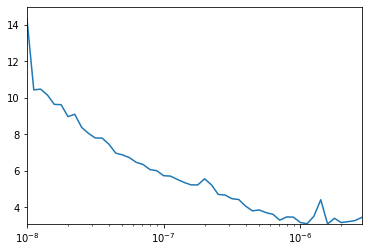

In [12]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([np.min(history.history['lr']), np.max(history.history['lr']), np.min(history.history['loss']), 15])
plt.show()

In [13]:
np.max(history.history['lr'])

2.8183829e-06

In [14]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(lr=1e-6), metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 478, 638, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 239, 319, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 237, 317, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 158, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 118, 158, 128)     0         
_________________________________________________________________
flatten (Flatten)            (None, 2386432)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [15]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
57/57 [==============================] - 18s 308ms/step - loss: 16.2509 - mae: 3.1566 - val_loss: 5.7611 - val_mae: 1.9307
Epoch 2/100
57/57 [==============================] - 17s 306ms/step - loss: 11.0398 - mae: 2.6294 - val_loss: 5.5599 - val_mae: 1.9101
Epoch 3/100
57/57 [==============================] - 17s 306ms/step - loss: 11.2735 - mae: 2.6314 - val_loss: 9.3463 - val_mae: 2.5212
Epoch 4/100
57/57 [==============================] - 17s 306ms/step - loss: 10.3589 - mae: 2.5238 - val_loss: 7.0044 - val_mae: 2.1031
Epoch 5/100
57/57 [==============================] - 17s 306ms/step - loss: 10.5449 - mae: 2.5927 - val_loss: 5.4568 - val_mae: 1.8691
Epoch 6/100
57/57 [==============================] - 17s 306ms/step - loss: 11.1852 - mae: 2.6746 - val_loss: 13.1775 - val_mae: 3.0037
Epoch 7/100
57/57 [==============================] - 17s 306ms/step - loss: 9.5727 - mae: 2.4537 - val_loss: 5.0237 - val_mae: 1.7746
Epoch 8/100
57/57 [==============================] - 17

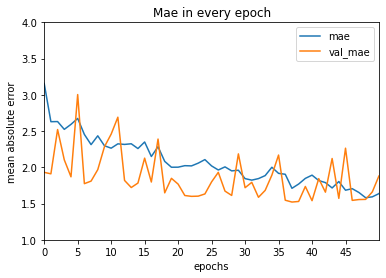

In [28]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['mae', 'val_mae'])
plt.ylim(1, 4)
plt.xlim(0, 50)

plt.xticks(np.arange(0,50, 5))

plt.xlabel('epochs')
plt.ylabel('mean absolute error')
plt.title('Mae in every epoch')
plt.show()

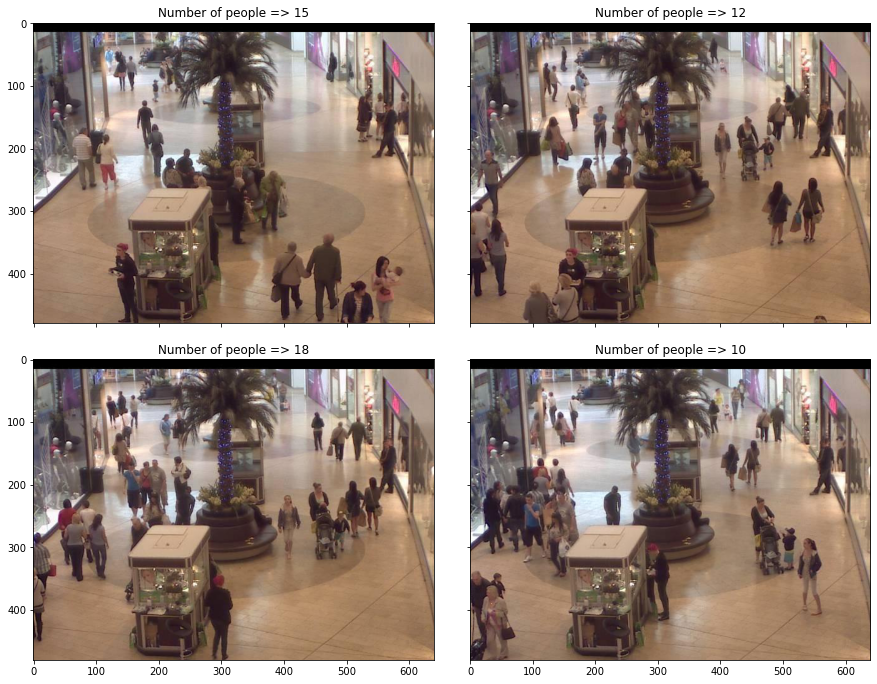

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


# set figure size

fig = plt.figure(figsize=(15,15))
grid = ImageGrid(
        fig, 111,
        nrows_ncols=(2,2),
        axes_pad=0.5
)

for x in range(0,4):
    
    grid[x].set_title('Number of people => ' + str(labels[x]))
    grid[x].imshow(img[x])